In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "../../dane/8CPU_20RAM/3600s/2repl/merged.csv"

### Wczytanie danych

In [2]:
data = pd.read_csv(path)
data = data.drop('replicaId', axis=1)
data = data.drop(["applicationTime_methods", "databaseTime_methods", "databaseTime_trading", 
                  "applicationTime_trading", "timestamp"], axis=1)

### Normalizacja danych

In [3]:
endpoint_map = {
    'do-register': 0,
    'add-sell-offer': 1,
    'add-buy-offer': 2,
    'get-stock-data': 3,
    'add-company': 4,
    'get-stock-users-and-companies': 5
}
data['endpointUrl_methods'] = data['endpointUrl_methods'].replace(endpoint_map)

data['cpuUsage_stock'] = round(data['cpuUsage_stock'], 2)
data['memoryUsage_stock'] = round(data['memoryUsage_stock'], 2)
data['cpuUsage_traffic'] = round(data['cpuUsage_traffic'], 2)
data['memoryUsage_traffic'] = round(data['memoryUsage_traffic'], 2)

data

,apiTime_methods,endpointUrl_methods,queueSizeForward_methods,queueSizeBack_methods,cpuUsage_stock,memoryUsage_stock,numberOfSellOffers_trading,numberOfBuyOffers_trading,cpuUsage_traffic,memoryUsage_traffic
0,494,0,0,0,0.57,0.30,1257,1731,0.12,0.62
1,517,0,0,0,0.57,0.30,53,1252,0.12,0.62
2,499,0,0,0,0.57,0.30,1257,1731,0.12,0.62
3,495,0,0,0,0.57,0.30,53,1252,0.12,0.62
4,564,0,0,0,0.57,0.30,1257,1731,0.12,0.62
...,...,...,...,...,...,...,...,...,...,...
536499,25,1,0,0,0.13,0.35,2805,3053,0.18,0.48
536500,124,3,0,0,0.13,0.35,2805,3053,0.18,0.48
536501,24,1,0,0,0.13,0.25,3012,3382,0.18,0.48
536502,25,1,0,0,0.13,0.35,2805,3053,0.18,0.48


### Statystyki opisowe

In [4]:
print(data.describe())

       apiTime_methods  endpointUrl_methods  queueSizeForward_methods   
count    536504.000000        536504.000000             536504.000000  \
mean      82888.361638             2.044218               4188.497185   
std       40909.830418             0.457391               3362.026438   
min           9.000000             0.000000                  0.000000   
25%       49770.000000             2.000000                976.000000   
50%       93796.000000             2.000000               3903.000000   
75%      116537.000000             2.000000               6809.000000   
max      151038.000000             5.000000              12770.000000   

       queueSizeBack_methods  cpuUsage_stock  memoryUsage_stock   
count          536504.000000   536504.000000      536504.000000  \
mean            15346.844762        0.490269           0.479946   
std              9111.175852        0.114740           0.237845   
min                 0.000000        0.130000           0.050000   
25%    

### Histogramy

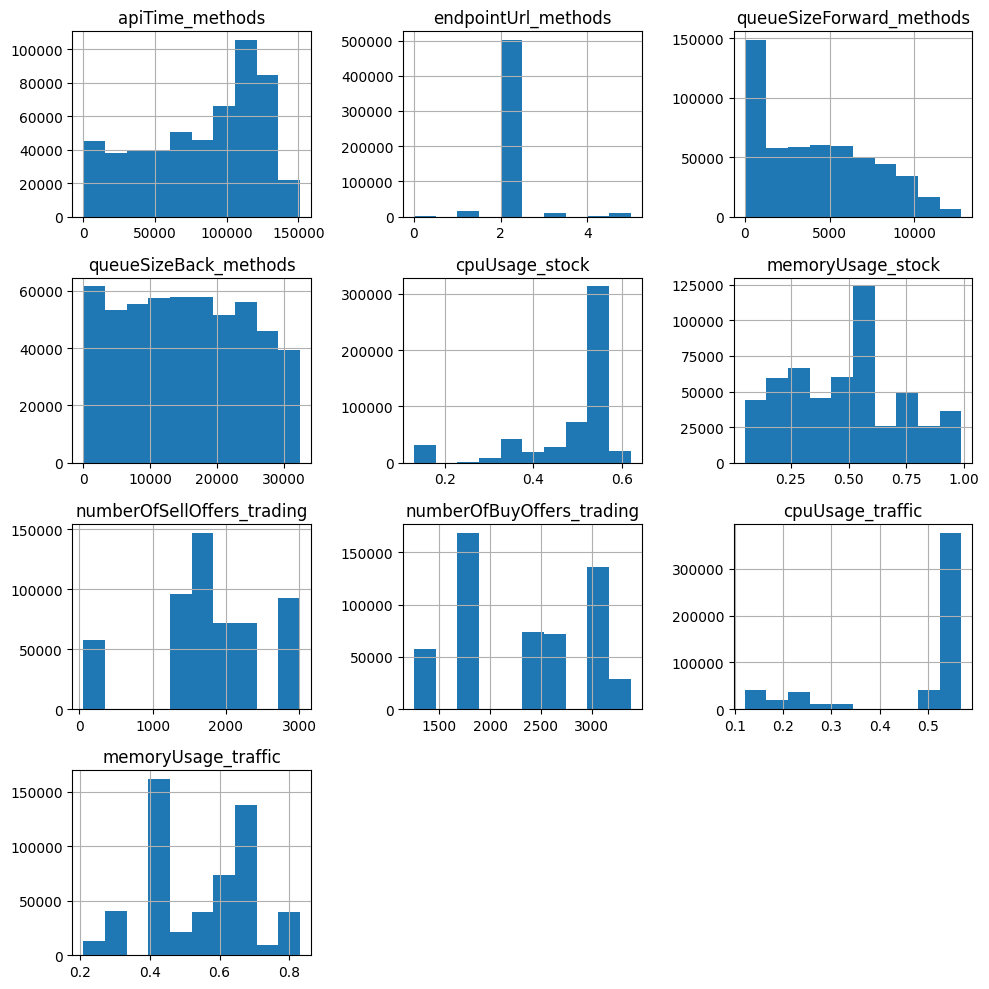

In [5]:
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

### Wykresy pudełkowe

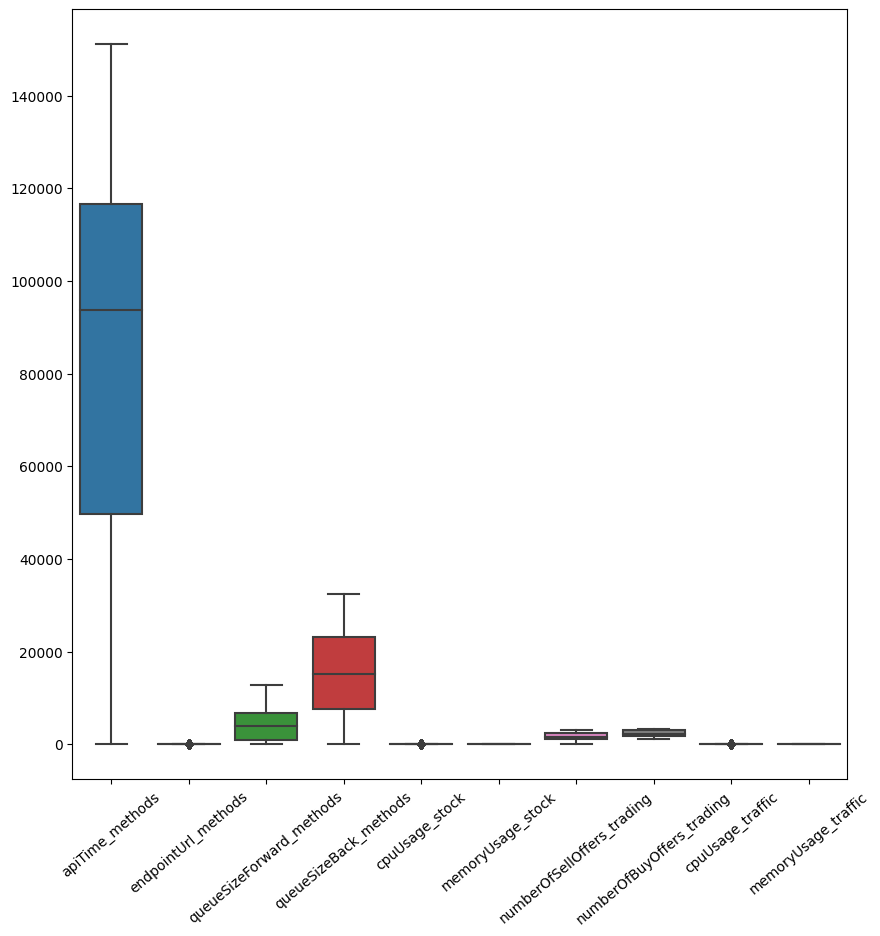

In [6]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data)
plt.xticks(rotation=40)
plt.show()

### Analiza korelacji

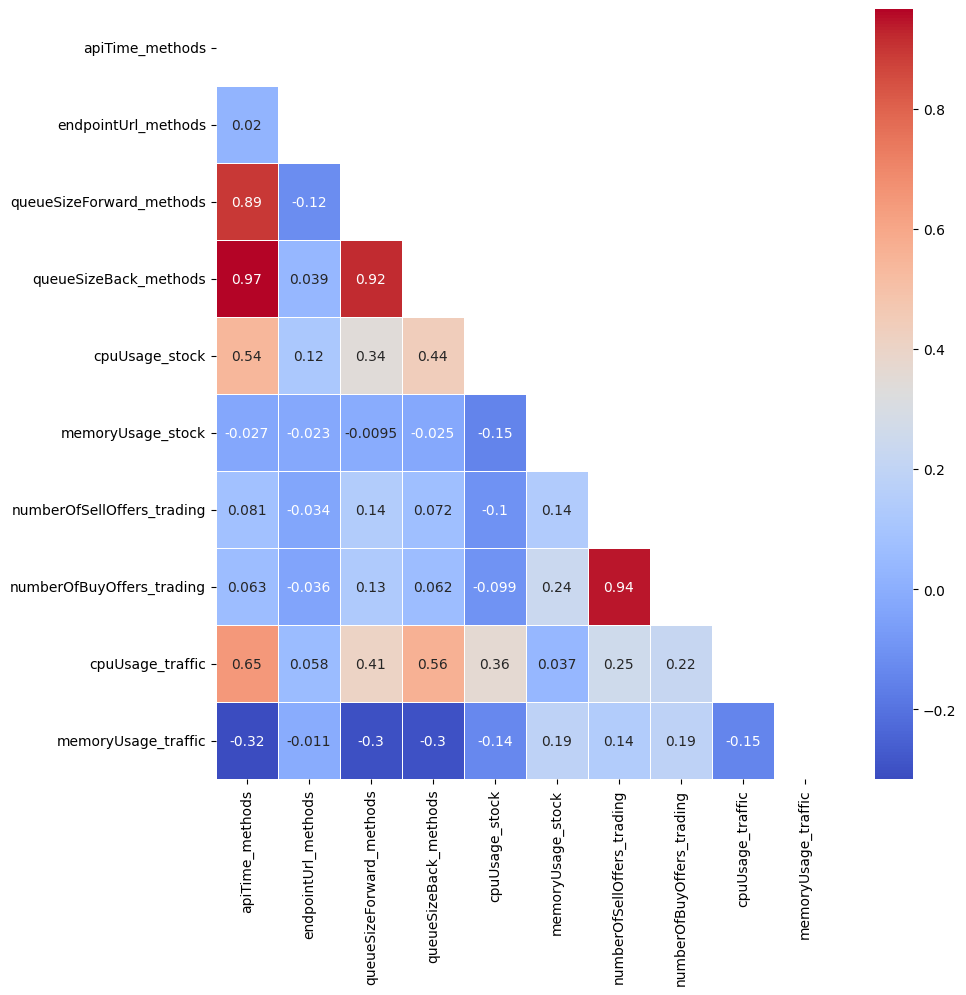

In [4]:
correlation_matrix = data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

### Wykresy skrzypcowe

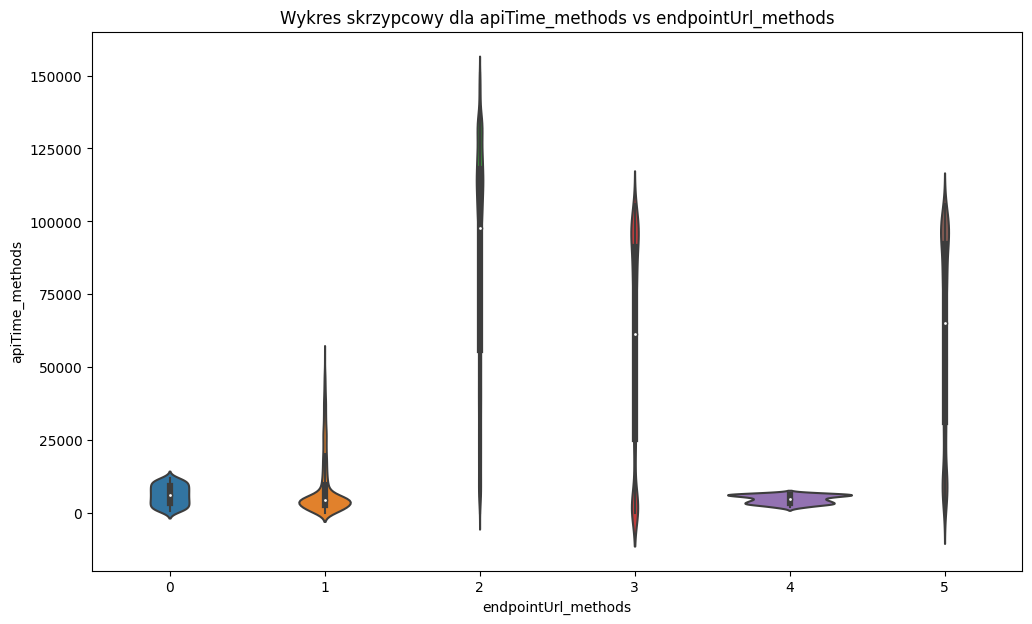

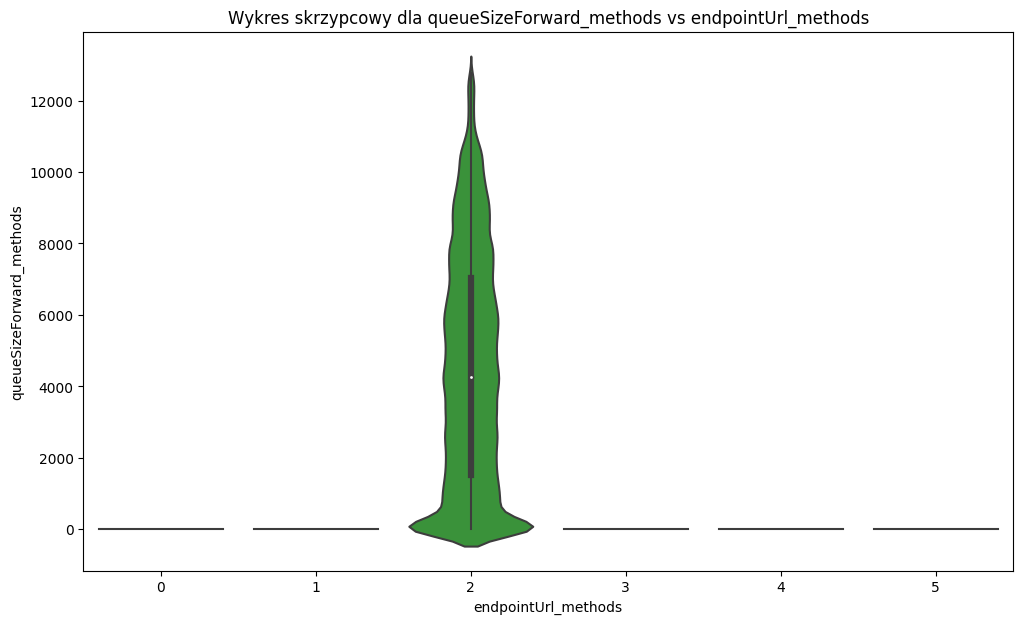

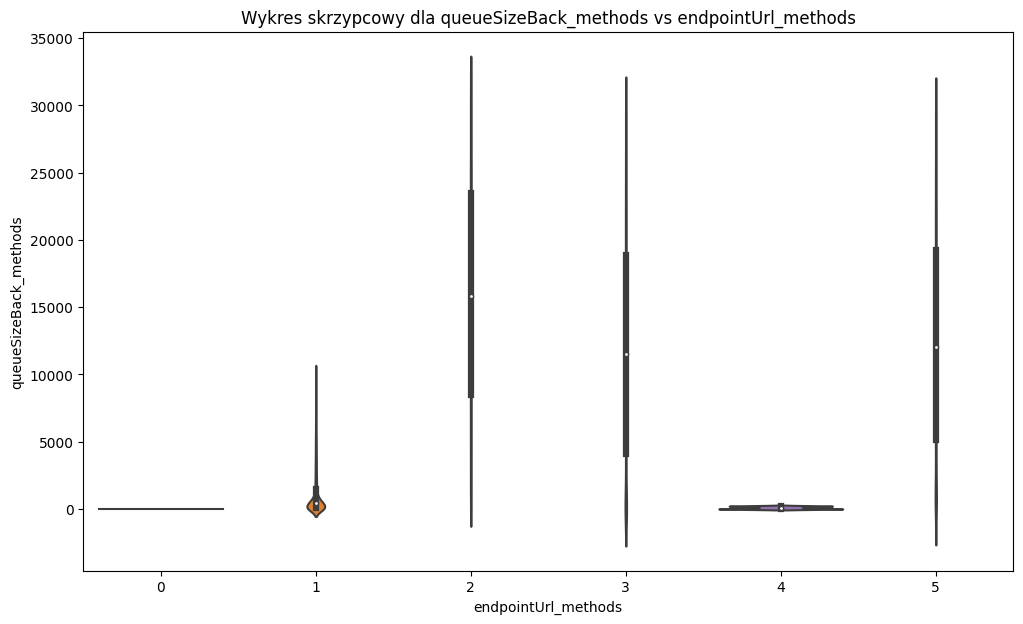

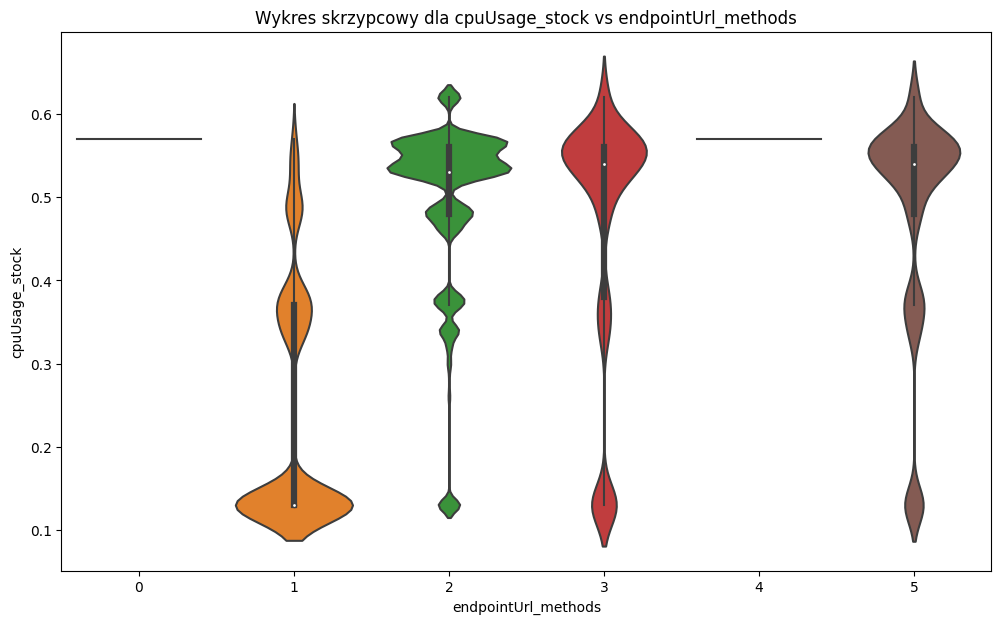

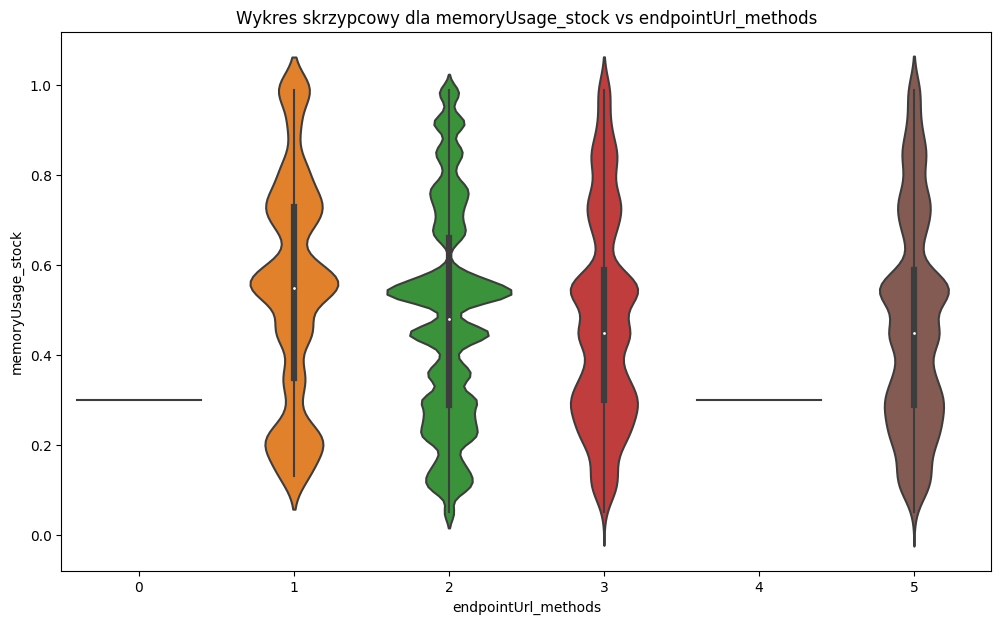

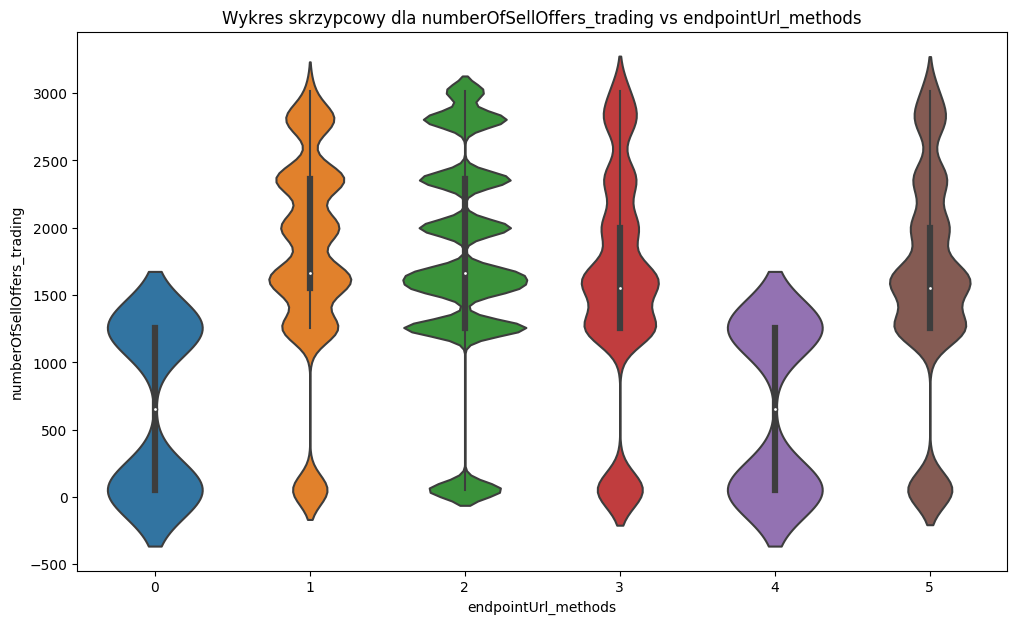

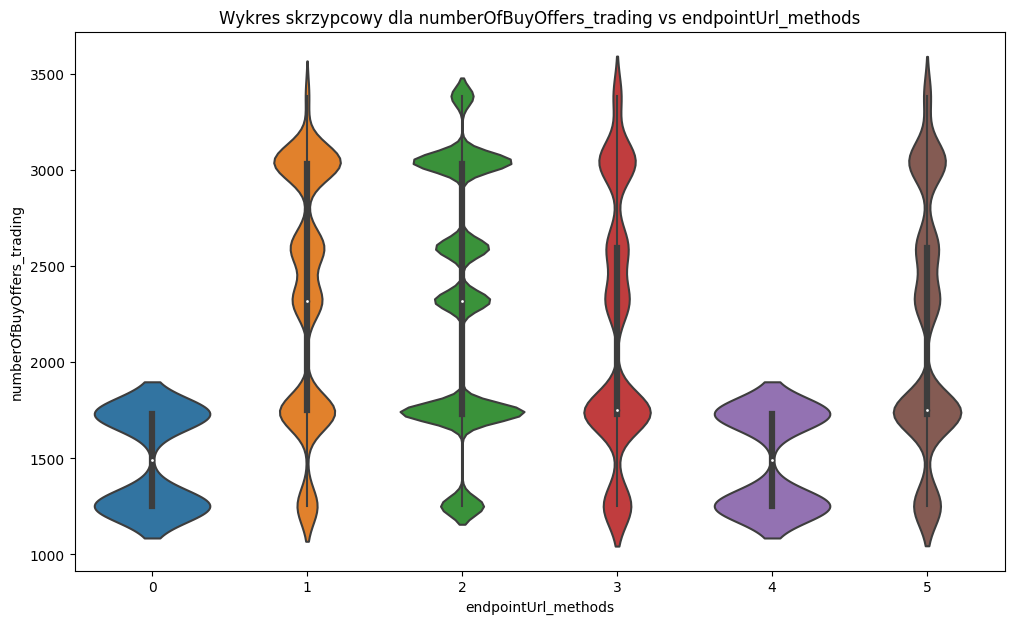

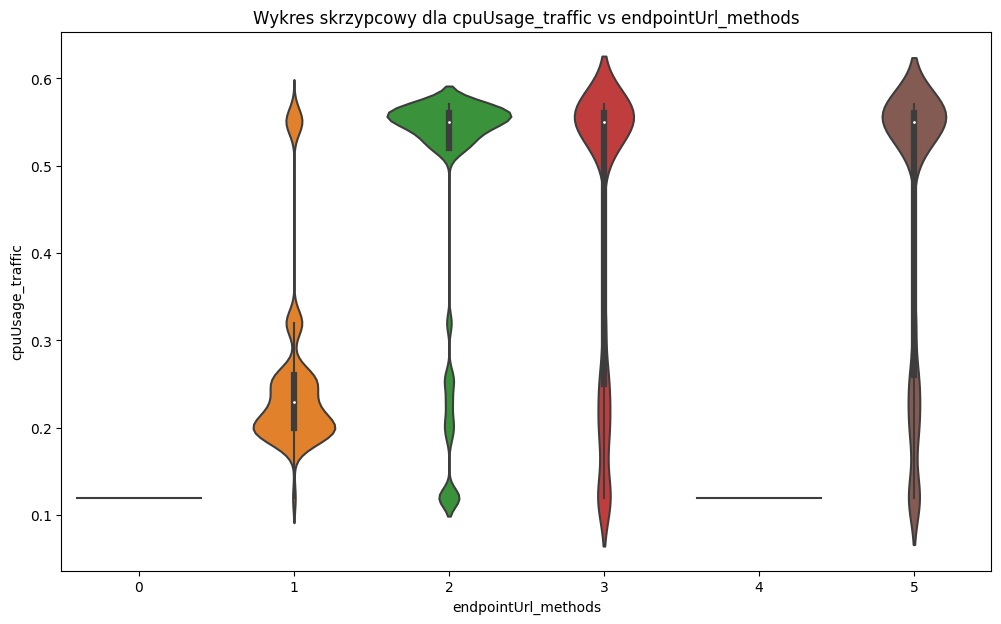

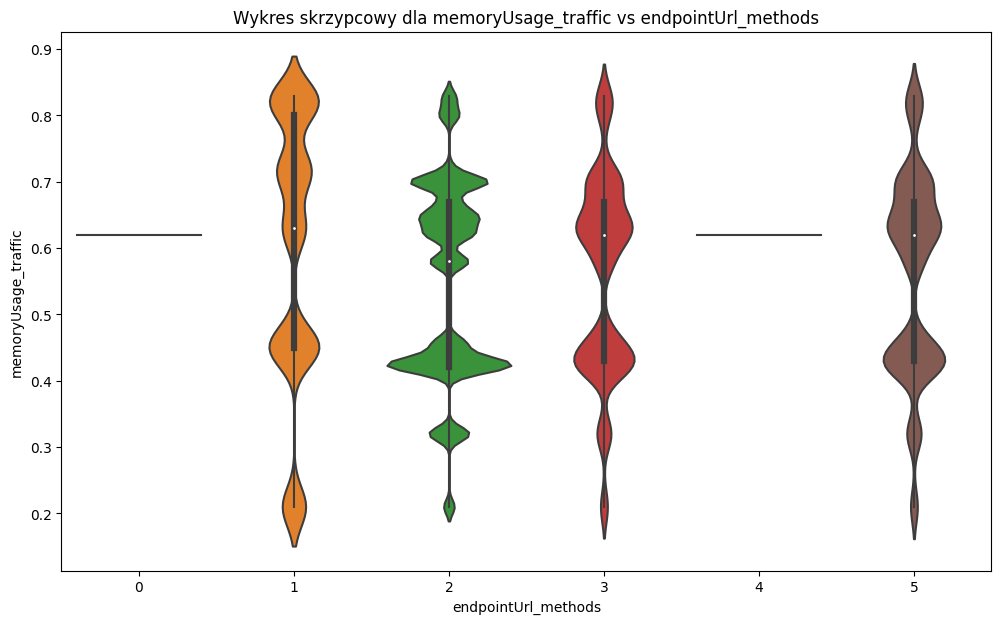

In [9]:
categorical_col = 'endpointUrl_methods'

for column in data.select_dtypes(include=[np.number]).columns:
    if column != categorical_col:
        plt.figure(figsize=(12, 7))
        sns.violinplot(x=categorical_col, y=column, data=data)
        plt.title(f"Wykres skrzypcowy dla {column} vs {categorical_col}")
        plt.show()